In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import scipy.optimize as opt

In [2]:
def randomwalk_time(time): 
    return np.array(range(time))

# Defining the Brownian motion for the velocity of the penguin
def randomwalk_v(time,alpha):
    v=[]
    for i in range(time):
        if i==0: # Set the initial velocity to be 0
            v.append(0)
        else:
            j=random.random()
            # There's a 50% chance that S = -1 and another 50% chance that S = 1
            if j<0.5:
                v.append(v[i-1]-alpha*v[i-1]-1)
            else:
                v.append(v[i-1]-alpha*v[i-1]+1)
    return v

def fitting_function(x,A,B):
    return A*np.exp(-1*B*x)

D:\python\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in multiply


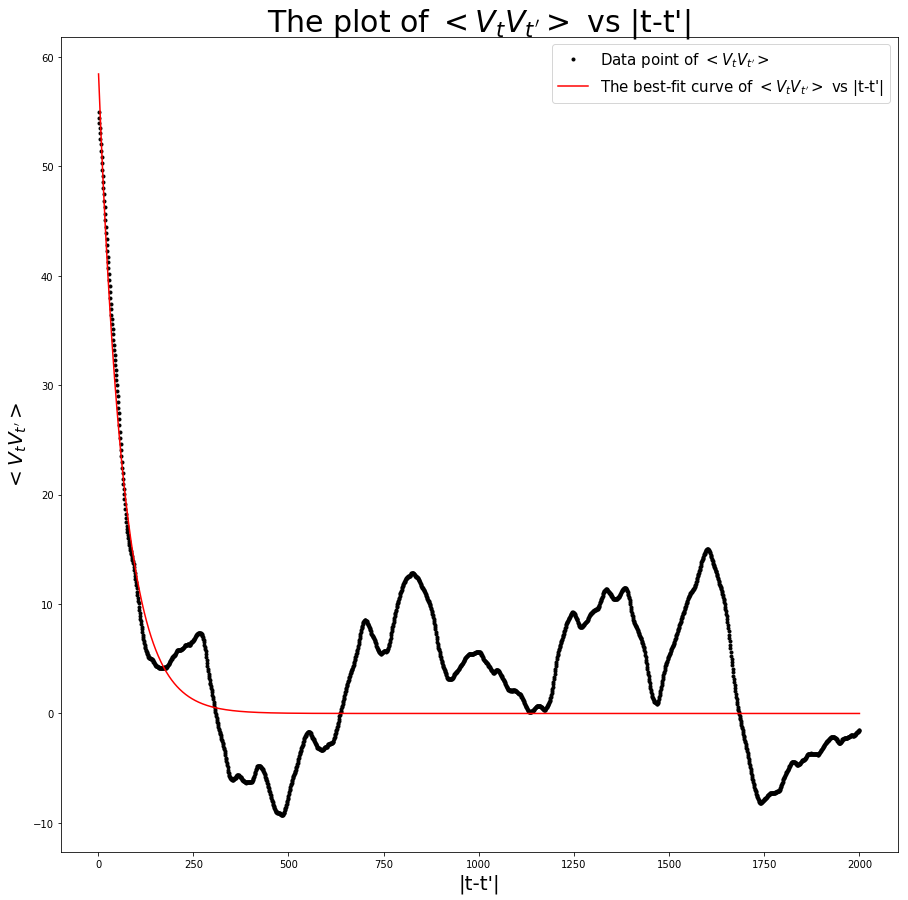

The estimated value of A is:59.34949226093462
The estimated value of B is:0.015357424106693376


In [5]:
t=randomwalk_time(10001) # Creating time array
y=randomwalk_v(10001,0.01) # Setting α= 0.01, and create the brownian motion
# Now let's estimate the coefficients A and B. Assume t and t' are large：
tt=np.linspace(1,2000,2000) # An array from 1 to 1000 of |t-t'|   
# Preparing two empty arrays
vv=[]
s=[]
# Start looping for different values of |t-t'|
for i in range(1,2001):
    # Looping for different t'
    for t_prime in range(5000,7001):
        # For each t',append in s the two values of <V_{t}V_{t'}> with |t-t'|=i
        s.append(y[t_prime]*y[t_prime+i])
        s.append(y[t_prime]*y[t_prime-i])
    # Append the average value of all elements in s into vv
    vv.append(np.average(s))
    # Setting s to be empty again for the use in the next loop
    s=[]

# Performing the best curve fitting
best_params, cov_matrix = opt.curve_fit(fitting_function, xdata = tt, ydata = vv, p0 = [10,0.5])
best_A, best_B=best_params # Get the estimated value of A and B
best_fit_curve=fitting_function(tt,best_A,best_B) # This is the best curve fit 

plt.figure(figsize=(15,15))
plt.plot(tt,vv,'.k',label="Data point of $<V_{t}V_{t'}>$") # The actual data
plt.plot(tt,best_fit_curve,'r',label="The best-fit curve of $<V_{t}V_{t'}>$ vs |t-t'|") # The best curve fit
plt.title("The plot of $<V_{t}V_{t'}>$ vs |t-t'|",fontsize=30)
plt.xlabel("|t-t'|",fontsize=20)
plt.ylabel("$<V_{t}V_{t'}>$",fontsize=20)
plt.legend(fontsize=15)
plt.show()

# Print the estimated value of A and B
print("The estimated value of A is:" + str(best_A))
print("The estimated value of B is:" + str(best_B))